# Create image files with the signal as a line plot

This is similar to the output you would see from CTG machine.

## Set up

In [1]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import signal

In [2]:
# Define file paths
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    data = './data_fhr_clean'
    images = './outputs/lineplots'


paths = Paths()

In [3]:
# Set up dictionary for signals
signals = dict()

# Get list of filenames and loop through them
filenames = os.listdir(paths.data)
for file in filenames:
    # Get filename and file extension
    filename, file_extension = os.path.splitext(os.path.join(paths.data, file))
    # Load data and save to dict with filename (without path/csv) as index
    if file_extension == '.csv':
        filename_short = filename.split('/')[-1]
        signals[filename_short] = pd.read_csv(os.path.join(paths.data, file))['FHR']

## Define function for producing the figures

Set consistent y axis limits, which we know must always be between 50 and 200, since we dropped values above and below that when cleaning the signals since they are non-physiologic.

In [4]:
def fhr_lineplot(record, show=False):
    '''
    Produce lineplot of FHR signal
    Inputs:
    - record - string, name of record from dictionary of FHR signals
    - show - boolean, if true print figure
    '''
    # Get the last 90 minutes of the chosen record
    sig = signals[record].tail(90*60)

    # Plot the signal
    fig, ax = plt.subplots()
    ax.plot(sig)
    ax.margins(x=0)
    plt.axis('off')
    plt.ylim(50, 200)
    plt.savefig(f'{paths.images}/{record}.png',
                bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()
    plt.close(fig)

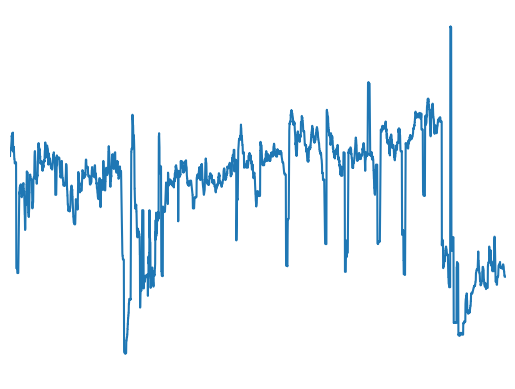

In [5]:
fhr_lineplot('1001', show=True)

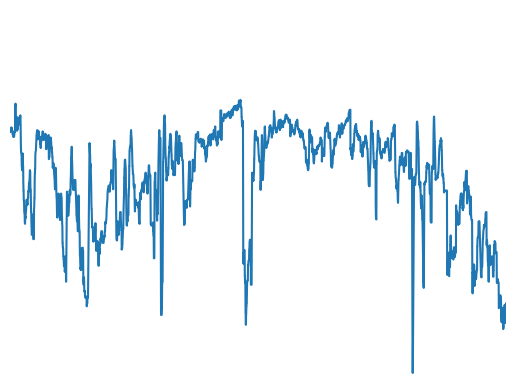

In [6]:
fhr_lineplot('1463', show=True)

## Generate figures for all the records and save as png files

In [7]:
for key, value in signals.items():
    fhr_lineplot(record=key)